In [2]:
import pandas as pd     #pip install pandas     #pip install openpyxl
import matplotlib.pyplot as plt               #pip install matplotlib
import seaborn as sns                         #ip install seaborn

In [3]:
#   1º Carregue o arquivo Excel vendas_ecommerce.xlsx em um DataFrame..

arquivo_xlsx = r"dados/vendas_ecommerce.xlsx"

# Carregue o arquivo Excel usando pandas
df = pd.read_excel(arquivo_xlsx, engine='openpyxl')
df.head()

,Data da Venda,ID do Cliente,Nome do Cliente,Categoria do Produto,Produto,Quantidade Vendida,Preço Unitário,ID da Transação
0,2024-07-01,167,Steve Williams,Brinquedos,Lego,1,1810.28,67a9c378-7c65-41e5-82e2-e662f728b4fa
1,2024-07-30,170,Elizabeth Woods,Roupas,Jaqueta,19,1315.57,37ebdcd9-e87a-4613-a443-df789558867f
2,2024-02-21,139,Charles Davis,Eletrônicos,Smartphone,13,1153.41,e8e5216a-fcbd-44c3-8021-2ef7cca5a5a1
3,2024-03-02,172,Dr. Stephanie Collins,Eletrônicos,Notebook,6,2509.06,d9b8a714-e61a-441c-92e0-c8b2bad640fb
4,2024-04-30,169,Justin Gomez,Roupas,Camiseta,20,1107.88,e9bb17bc-a3f2-49bf-9c63-16b950f24455


In [4]:
#   2º 
#   - Calcule o total de vendas por categoria de produto.
#   - Filtre os dados para mostrar apenas as vendas realizadas no último mês.
#   - Adicione uma nova coluna que indique o valor total da venda (QuantidadeVendida * Preço Unitário).

# Quantida de produtos por categorias
categoria = df.groupby('Categoria do Produto').size()
#print(categoria)

# Total de vendas por cada categoria
total_vendas_por_categoria = df.groupby('Categoria do Produto')['Preço Unitário'].sum()
#print(total_vendas_por_categoria)

# Vendas realizadas no último mes, filtrando os dados entre duas datas
vendas_ultimo_mes = df[(df['Data da Venda'] >= "2024-07-01") & (df['Data da Venda'] <= "2024-07-31")]
#print(vendas_ultimo_mes)

#Adicione uma nova coluna que indique o valor total da venda (QuantidadeVendida * Preço Unitário).
df['valor_total_venda'] = df['Quantidade Vendida'] * df['Preço Unitário']
df.head()

,Data da Venda,ID do Cliente,Nome do Cliente,Categoria do Produto,Produto,Quantidade Vendida,Preço Unitário,ID da Transação,valor_total_venda
0,2024-07-01,167,Steve Williams,Brinquedos,Lego,1,1810.28,67a9c378-7c65-41e5-82e2-e662f728b4fa,1810.28
1,2024-07-30,170,Elizabeth Woods,Roupas,Jaqueta,19,1315.57,37ebdcd9-e87a-4613-a443-df789558867f,24995.83
2,2024-02-21,139,Charles Davis,Eletrônicos,Smartphone,13,1153.41,e8e5216a-fcbd-44c3-8021-2ef7cca5a5a1,14994.33
3,2024-03-02,172,Dr. Stephanie Collins,Eletrônicos,Notebook,6,2509.06,d9b8a714-e61a-441c-92e0-c8b2bad640fb,15054.36
4,2024-04-30,169,Justin Gomez,Roupas,Camiseta,20,1107.88,e9bb17bc-a3f2-49bf-9c63-16b950f24455,22157.60


In [5]:
#   3º
#   - Exporte os resultados filtrados para um novo arquivo Excel chamadovendas_filtradas.xlsx.

# Exportar o DataFrame filtrado para um arquivo Excel
caminho_arquivo = r'dados/vendas_ultimo_mes.xlsx'
vendas_ultimo_mes.to_excel(caminho_arquivo, index=False, engine='openpyxl')

print(f"Arquivo exportado para: {caminho_arquivo}")

Arquivo exportado para: dados/vendas_ultimo_mes.xlsx


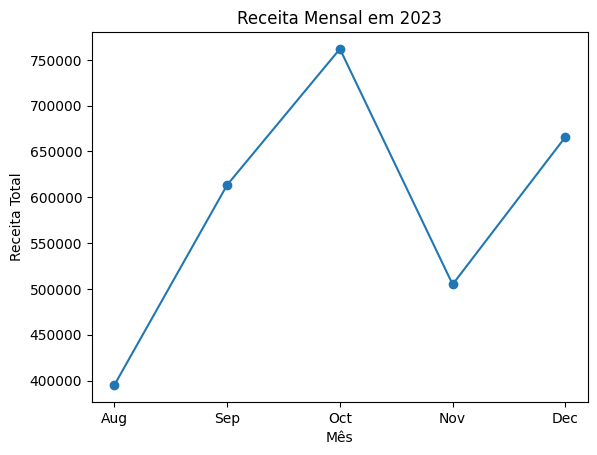

In [6]:
#   4º
#   - Extraia insights adicionais dos dados através de cruzamento de informações estorytelling. Explore relações entre categorias, sazonalidade, ou comportamento dos clientes.

#   Receita mensal de 2023
# Obtem mes e ano
df['Mês'] = df['Data da Venda'].dt.month
df['Ano'] = df['Data da Venda'].dt.year

# obtem apenas de 2023
df_2023 = df[df['Ano'] == 2023]

# Agrupar por mês e calcular a receita total mensal
receita_mensal = df_2023.groupby('Mês')['valor_total_venda'].sum()

# Plotar o gráfico
plt.plot(receita_mensal.index, receita_mensal.values, marker='o')
plt.title('Receita Mensal em 2023')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.xticks(receita_mensal.index, ['Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [7]:
#   Parte 2 - Análise por Cliente:
#   - Calcule a receita total gerada por cada cliente.
#   - Identifique os 5 clientes que geraram a maior receita e faça uma análise sobre o comportamento deles.


#   calcular a receita total por cliente
receita_por_cliente = df.groupby('ID do Cliente')['valor_total_venda'].sum()

#   obtem os 5 com mais receita
top_5_clientes = receita_por_cliente.nlargest(5)

#   media de venda por cliente, transforma em dataframe e depois renomeia o campo
media = df.groupby('Nome do Cliente')['valor_total_venda'].mean().reset_index()
media = media.rename(columns={'valor_total_venda': 'media_valor_venda'})
print(media)

        Nome do Cliente  media_valor_venda
0          Aaron Graham           22942.81
1            Aaron Hale           21738.80
2    Abigail Nichols MD           28881.33
3           Adam Fields            1152.30
4         Adam Griffith            3131.24
..                  ...                ...
494       William Hines            1234.48
495       William Jones             315.94
496     William Robbins           44533.91
497      William Turner            6301.11
498           Zoe Marks           26561.16

[499 rows x 2 columns]


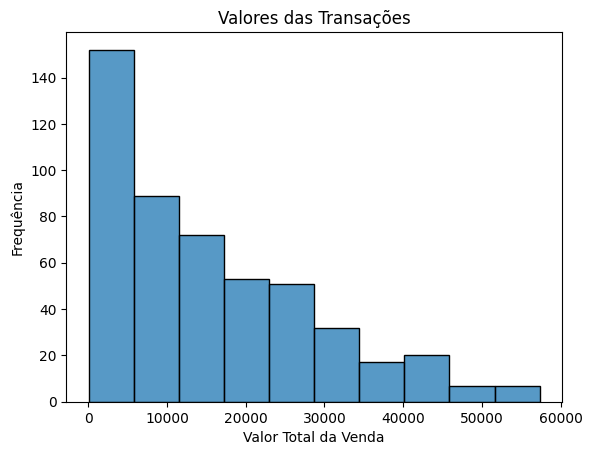

In [8]:
#   Parte 2 - Visualização dos Dados:
#   - Crie uma visualização que mostre a distribuição dos valores das transações.
#   - Gere um gráfico que mostre a receita mensal do e-commerce ao longo do último ano.

#   defino qual coluna vai ser usada, o intervalo e desativa curva de densidade
sns.histplot(df['valor_total_venda'], bins=10, kde=False)
#   Define o titulo
plt.title('Valores das Transações')
#   Nome do X que é o horizontal
plt.xlabel('Valor Total da Venda')
#   Nome do Y que é o vertical
plt.ylabel('Frequência')
# Exibi
plt.show()


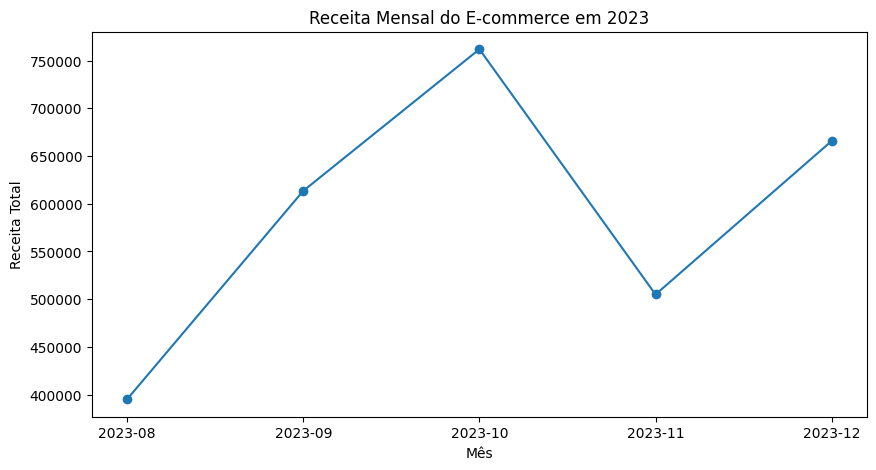

In [9]:
# Converter a coluna 'Data da Venda' para o tipo datetime
df['Data da Venda'] = pd.to_datetime(df['Data da Venda'])

# Filtrar os dados para o último ano
df = df[df['Data da Venda'].dt.year == 2023]

# Agrupar por mês e calcular a receita total mensal
df['Mês'] = df['Data da Venda'].dt.to_period('M')
receita_mensal = df.groupby('Mês')['valor_total_venda'].sum()

# Plotar o gráfico
plt.figure(figsize=(10, 5))
plt.plot(receita_mensal.index.astype(str), receita_mensal.values, marker='o')
plt.title(f'Receita Mensal do E-commerce em 2023')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.show()